### Q1.I

In [4]:
library(ggplot2)
library(reshape2)

In [5]:
#loading datasets
data_train <- read.csv('assignment1_datasets/Task1A_train.csv')
data_test <- read.csv('assignment1_datasets/Task1A_test.csv')

In [6]:
train.data <- data_train[,-2]
train.label <- data_train[,2]
test.data <- data_test[,-2]
test.label <- data_test[,2]

In [7]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3){
    
    my_data_test <- as.data.frame(test.data)
    my_data_train <- as.data.frame(train.data)

    train.len <- nrow(my_data_train)
    test.len <- nrow(my_data_test)

    colnames(my_data_test) <- c("merged")
    colnames(my_data_train) <- c("merged")
    
    #distance between train and test values in matrix form
    #row = test points, column, train points
    dist <- as.matrix(dist(rbind(my_data_test, my_data_train), method = 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    test_label <- c()
    ## for each test sample...
    for (i in 1:test.len){
        #nn represents the index number of the K(three) smallest values from the train.data set
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        #print(nn)
        ###... and calculate the predicted labels according to the majority vote
        #first loop: nn represents the index of the 3 closest points(taken from train data set)
        #to the first point in the test data frame 
        ##train.label[nn] returns the corresponding the three labels located in nn index
        #lastly we update the test.label[1] with our finding
        test_label[i]<- sum(train.label[nn])/K
    }
    
    ## return the class labels as output
    ## test.label has changed because of KNN update
    return (test_label)
}

In [8]:
train_size <- length(train.data)
test_size <- length(test.data)
miss <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    knn_train <- knn(train.data, train.label, train.data, K=k)
    knn_test <- knn(train.data, train.label, test.data, K=k)
    
    error_train <- sum((knn_train - train.label)^2)
    error_test <- sum((knn_test - test.label)^2)
    #error percentage on train data
    miss[k,'train'] <- error_train/train_size
    #error percentage on test data
    miss[k,'test'] <-  error_test/test_size
}

### Q1.II

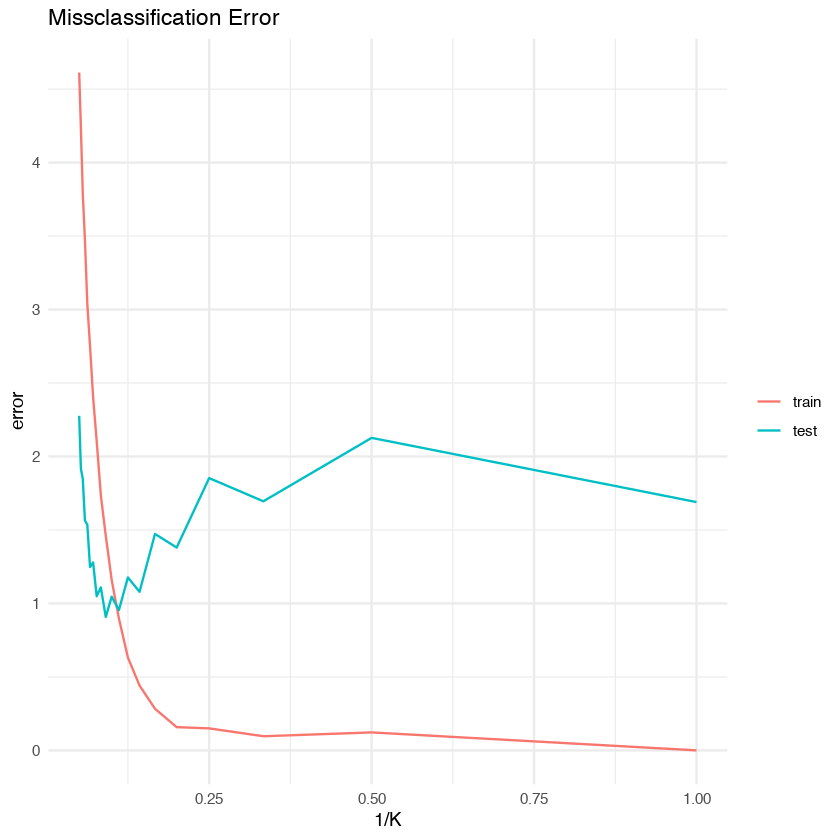

In [9]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=1/K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

### Q1.III

In [11]:
miss.m

K,type,error
1,train,0.00000000
2,train,0.12229226
3,train,0.09634101
4,train,0.14983810
5,train,0.15821952
6,train,0.28321620
7,train,0.44165671
8,train,0.63131202
9,train,0.89775229
10,train,1.15967988


In [12]:
test=miss.m[miss.m$type=='test',]
cat('Minimum test error occurs at K=',test[which.min(test$error),'K'])

Minimum test error occurs at K= 11

The optimum value for K appears to be at K=11. The reason is that we want the training error as low as possible while avoiding over-fitting. Likewise, we do not want the training error high as our model would poorly fit into the training data and consequently the test data. As K (the number of neighbours we take into account when deciding which label a data point will have) increases, our model will under-fit the data. Similarly, as K decreases, our model will over-fit the data. For higher K values than 11, even though the test error is relatively lower, we have high training error which means we have a model that don't even fit in our existing data -How would we expect it fit into unknown data? Therefore, K=11 would be the best choice.